In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from urllib.request import Request,urlopen
req=Request("https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.monthly_ns_avg.txt",headers={'User-Agent': 'Mozilla/5.0'})
content=urlopen(req).read()
file=open("hadcrut.txt","wb")
file.write(content)
file.close()
hadcrut=pd.read_csv(file.name,delim_whitespace=True,usecols=[0,1],header=None)
hadcrut["month"]=hadcrut[0].str.split("/").str[1].astype(int)
hadcrut["year"]=hadcrut[0].str.split("/").str[0].astype(int)
hadcrut.rename(columns={1:"value"},inplace=True)
hadcrut=hadcrut[["value","month","year"]].copy()
hadcrut["year"].value_counts(ascending=True).head()
hadcrut=hadcrut.drop(hadcrut[hadcrut["year"]==2019].index)
hadcrut["year"].value_counts(ascending=True).head()
hadcrut=hadcrut.set_index(["year","month"])
hadcrut.head(20)
hadcrut -= hadcrut.loc[1850:1900].mean()
hadcrut.head()
hadcrut=hadcrut.reset_index()
hadcrut.head()

,year,month,value
0,1850,1,-0.386559
1,1850,2,0.027441
2,1850,3,-0.418559
3,1850,4,-0.249559
4,1850,5,-0.013559


In [4]:
annee = []
for i in range(1849,2020):
    annee.append(i)

# Palette de couleurs

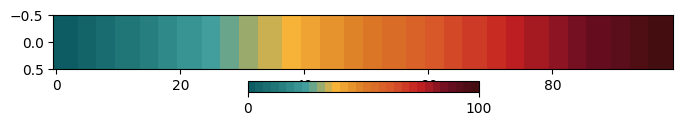

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Définir les couleurs de la palette en RGB
colors = [ "#0D5C63","#247B7B","#44a1a0ff",    "#F7B538", "#DB7C26",  "#D8572A","#C42021", "#6C0E23", "#440D0F"]

# Définir les positions normalisées pour chaque couleur
positions = [0.0, 0.5, 1.0]

# Créer la colormap
cmap = LinearSegmentedColormap.from_list('my_gradient', colors, N=30)

# Créer une figure pour visualiser la colormap
fig, ax = plt.subplots(figsize=(8, 1))
cax = ax.imshow(np.linspace(0, 100, 100).reshape(1, 100), cmap=cmap, aspect='auto', vmin=0, vmax=100)
fig.colorbar(cax, orientation='horizontal', ticks=[0, 100])

# Afficher la figure
plt.show()

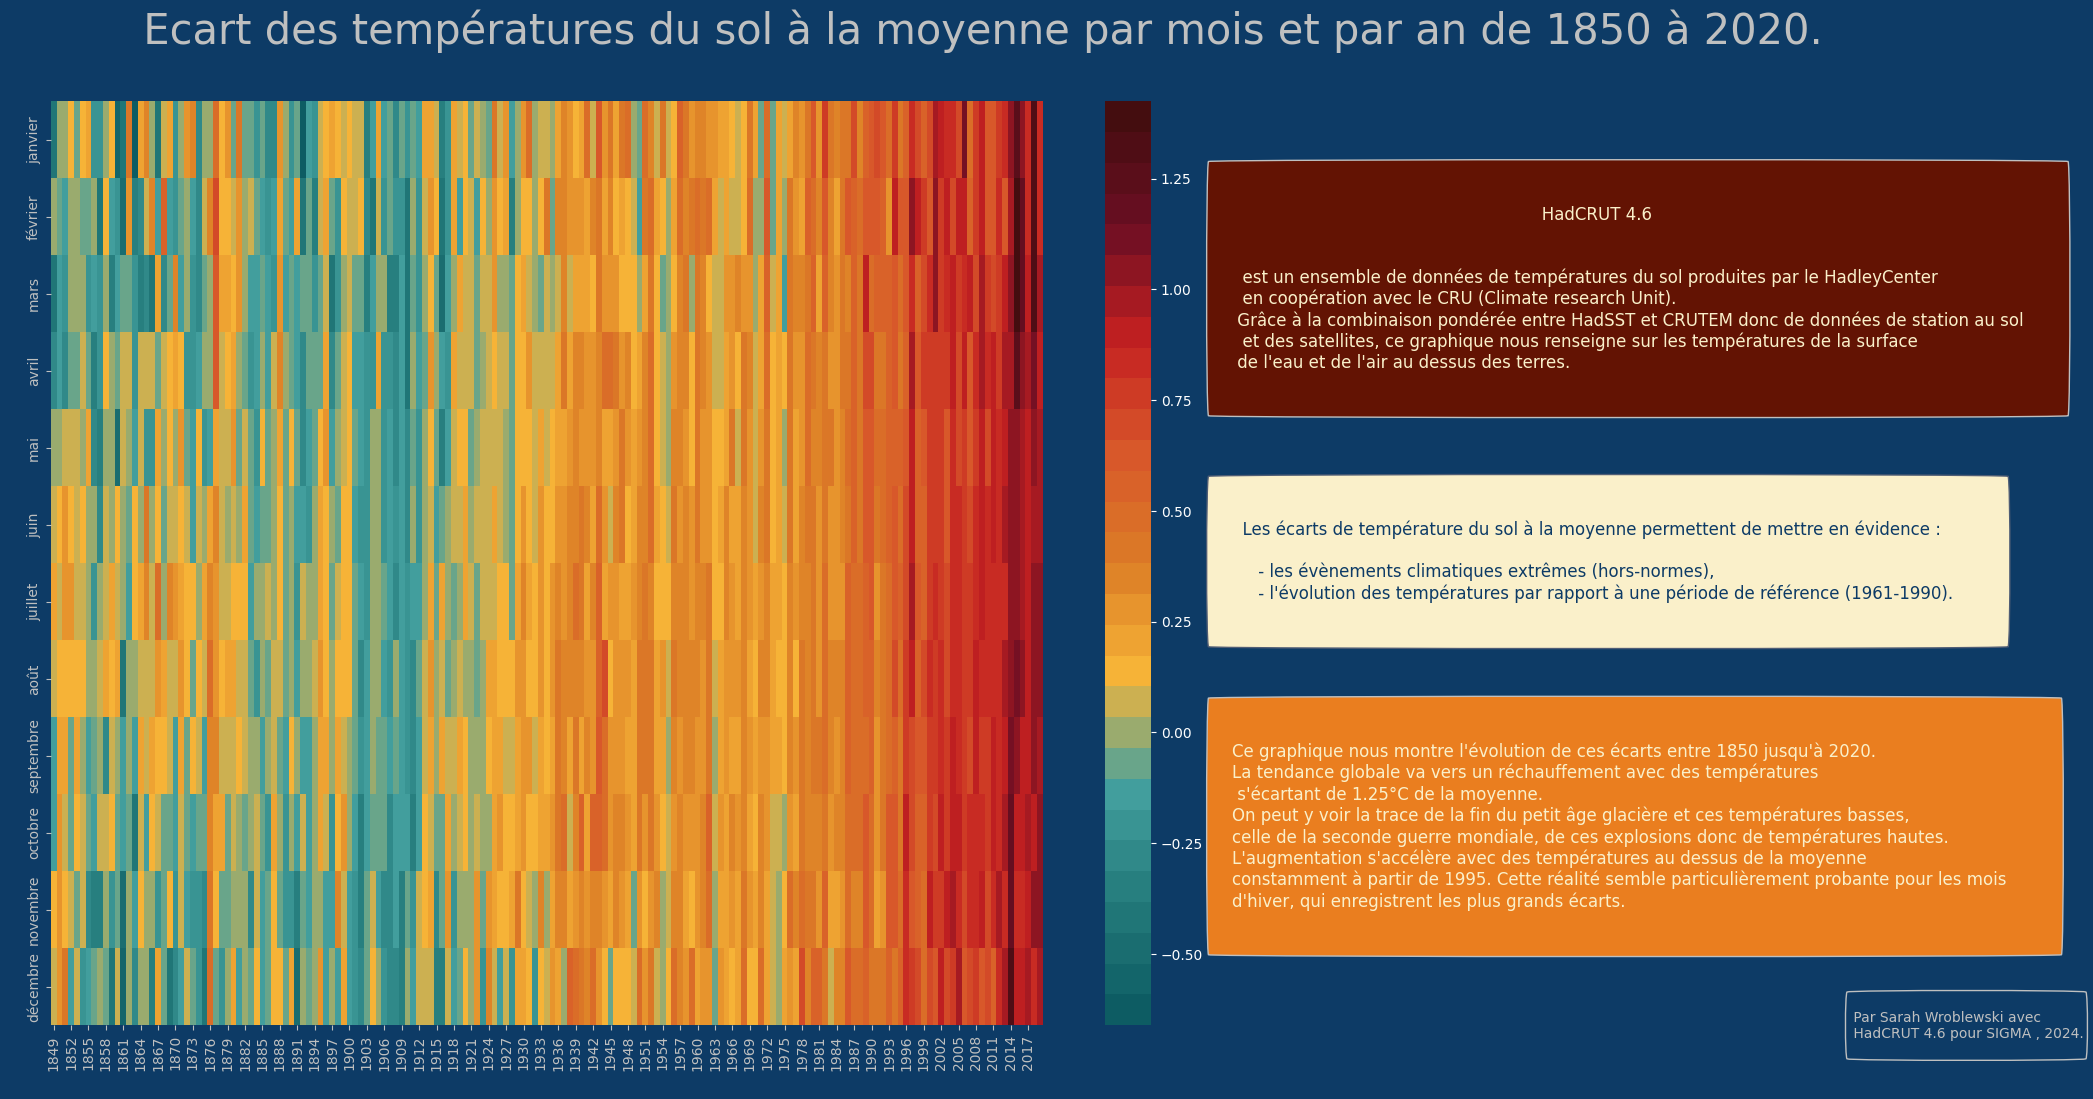

In [20]:
from matplotlib.font_manager import FontProperties
import seaborn as sns 

# Utiliser la fonction pivot pour réorganiser les données
heatmap_data = hadcrut.pivot_table(index='month',columns='year',  values='value')
heatmap_data.columns = annee
# Définir une liste pour les noms des ticks
custom_xticklabels = ["janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre"] 

# Créez la heatmap avec seaborn
fig = plt.figure(figsize=(16, 12))

plt.style.use('dark_background') # avoir les polices de la légende en blanc

# Création de la heatmap
ax1 =sns.heatmap(heatmap_data,  cmap=cmap, fmt='g', yticklabels=custom_xticklabels)
# Couleur du fond
fig.set_facecolor("#0D3B66")

plt.ylabel(' ', rotation = 45, color='#BFC0C0')
plt.xlabel(' ', rotation = 45, color='#BFC0C0')
ax1.tick_params(axis='x', colors='#BFC0C0')  # Couleur des étiquettes de l'axe x
ax1.tick_params(axis='y', colors='#BFC0C0')  # Couleur des étiquettes de l'axe y

# Ajouter tout le texte et les bbox colorées autour
t0 = ax1.text(310, 12.37, "\n Par Sarah Wroblewski avec \n HadCRUT 4.6 pour SIGMA , 2024.\n",color="#BFC0C0",fontsize=10)
t0.set_bbox(dict(facecolor='#0D3B66',  edgecolor='#BFC0C0',boxstyle='round4'))

t1 = ax1.text(200, 4, "\n\n                                                               HadCRUT 4.6 \
        \n\n\n      est un ensemble de données de températures du sol produites par le HadleyCenter \
        \n      en coopération avec le CRU (Climate research Unit).\
         \n     Grâce à la combinaison pondérée entre HadSST et CRUTEM donc de données de station au sol\
        \n      et des satellites, ce graphique nous renseigne sur les températures de la surface \
         \n     de l'eau et de l'air au dessus des terres.\n\n", size = 12, va="baseline", ha="left", multialignment="left", color='#FAF0CA')
t1.set_bbox(dict(facecolor='#631303',  edgecolor='#BFC0C0',boxstyle='round4'))


t2 = ax1.text(200, 7," \n\n      Les écarts de température du sol à la moyenne permettent de mettre en évidence :  \
         \n\n         - les évènements climatiques extrêmes (hors-normes), \
         \n         - l'évolution des températures par rapport à une période de référence (1961-1990). \
         \n\n     ", size=12,va="baseline", ha="left", multialignment="left", bbox=dict(fc="none"), color='#0D3B66')
t2.set_bbox(dict(facecolor='#FAF0CA',  edgecolor='#4F5D75',boxstyle='round4'))

t3 = ax1.text(200, 11, "\n\
          \n    Ce graphique nous montre l'évolution de ces écarts entre 1850 jusqu'à 2020. \
          \n    La tendance globale va vers un réchauffement avec des températures\
          \n     s'écartant de 1.25°C de la moyenne.\
         \n    On peut y voir la trace de la fin du petit âge glacière et ces températures basses,\
          \n    celle de la seconde guerre mondiale, de ces explosions donc de températures hautes.\
          \n    L'augmentation s'accélère avec des températures au dessus de la moyenne\
          \n    constamment à partir de 1995. Cette réalité semble particulièrement probante pour les mois\
          \n    d'hiver, qui enregistrent les plus grands écarts.\
          \n\n     "
              , size=12,
         va="baseline", ha="left", multialignment="left", color='#FAF0CA')
t3.set_bbox(dict(facecolor='#EA7E1F',  edgecolor='#BFC0C0',boxstyle='round4'))

# Ajoutez des titres et des labels
plt.title(' Ecart des températures du sol à la moyenne par mois et par an de 1850 à 2020.\
          \n', y = 1, x= 1,ha='center',fontsize=30, color='#BFC0C0')

# Affichez la heatmap
plt.show()